# Demonstrasi Network Analysis

Sumber:
https://chat.openai.com/share/1747c75d-67e0-4fc5-9a52-f765f7c6adaf

Siklus umum dalam analisis jaringan (network analysis):

1. **Pengumpulan Data Jaringan**: Dapatkan data jaringan yang relevan untuk analisis Anda. Data jaringan bisa berupa struktur fisik atau hubungan antara entitas (node) dan koneksi di antara mereka (edge). Sumber data bisa berupa data sosial, data transportasi, data komunikasi, dan sebagainya.

2. **Pembersihan Data**: Langkah ini melibatkan pembersihan data jaringan dari noise, data yang hilang, atau kesalahan pengukuran. Ini mungkin melibatkan identifikasi dan penanganan node atau edge yang tidak valid atau tidak relevan.

3. **Ekstraksi Fitur**: Ekstraksi fitur dari jaringan yang relevan dengan tujuan analisis Anda. Fitur-fitur ini bisa mencakup ukuran sentralitas, kepadatan jaringan, modularitas, atau atribut lain yang bergantung pada konteks analisis.

4. **Analisis Deskriptif**: Lakukan analisis deskriptif untuk memahami struktur jaringan yang ada. Ini melibatkan visualisasi jaringan, mengidentifikasi node penting atau kluster, dan menganalisis distribusi atribut di dalam jaringan.

5. **Analisis Eksploratif**: Lanjutkan dengan analisis eksploratif untuk menemukan pola-pola yang menarik atau hubungan yang tidak terduga dalam jaringan. Ini bisa mencakup deteksi komunitas, identifikasi jalur-jalur krusial, atau analisis perubahan jaringan dari waktu ke waktu.

6. **Modelisasi dan Prediksi**: Berdasarkan pemahaman Anda tentang struktur dan dinamika jaringan, Anda dapat membangun model matematika atau statistik untuk memprediksi perilaku jaringan di masa depan. Ini bisa termasuk model prediksi node terhubung, penyebaran informasi, atau dinamika jaringan yang lebih kompleks.

7. **Evaluasi Model**: Evaluasi kinerja model Anda menggunakan metrik yang relevan. Hal ini memungkinkan Anda untuk mengetahui seberapa baik model Anda dapat memprediksi perilaku jaringan sesuai dengan tujuan analisis Anda.

8. **Interpretasi dan Komunikasi Hasil**: Interpretasikan hasil analisis Anda dan komunikasikan temuan Anda kepada pemangku kepentingan. Ini bisa melibatkan pembuatan laporan, presentasi, atau visualisasi yang menjelaskan temuan dan implikasinya dengan jelas.

9. **Tindak Lanjut**: Berdasarkan hasil analisis, tentukan tindakan selanjutnya yang perlu diambil. Ini bisa termasuk membuat keputusan strategis, mengoptimalkan jaringan, atau merancang intervensi untuk mempengaruhi perilaku jaringan.

Sama seperti dalam analisis data pada umumnya, siklus analisis jaringan juga bisa berulang kembali untuk mengeksplorasi lebih lanjut atau mengambil keputusan baru berdasarkan data yang baru diperoleh atau pemahaman yang berkembang.

## Persiapan

Untuk mempersiapkan data Anda untuk proses analisis jaringan, Anda dapat melakukan beberapa tahap pembersihan dan persiapan tambahan, tergantung pada kebutuhan spesifik Anda. Berikut adalah langkah-langkah yang mungkin berguna:

1. **Pembersihan Data**:
   - Hapus data duplikat: Gunakan `drop_duplicates()` untuk menghapus baris yang identik.
   - Tangani nilai yang hilang: Gunakan `fillna()` untuk mengganti nilai yang hilang dengan nilai rata-rata, median, atau metode penggantian lainnya.
   - Konversi tipe data: Pastikan tipe data kolom sesuai dengan jenis data yang seharusnya. Misalnya, konversi kolom kategorikal ke tipe data kategorikal, atau kolom tanggal ke tipe data datetime.

2. **Pemilihan Data**:
   - Identifikasi variabel yang relevan untuk analisis jaringan. Ini bisa menjadi kolom yang mencerminkan hubungan antara entitas, seperti ID entitas dan ID entitas lain yang terhubung dengannya.
   - Pertimbangkan apakah ada atribut tambahan yang ingin Anda sertakan dalam analisis jaringan, seperti atribut node (misalnya, jenis kelamin, usia, dll.).

3. **Konstruksi Graf**:
   - Gunakan data yang telah dipilih untuk membangun graf menggunakan library NetworkX atau alat lainnya.
   - Tentukan apakah graf Anda harus berarah atau tidak, tergantung pada arah koneksi antara entitas dalam dataset Anda.
   - Jika diperlukan, lakukan praproses tambahan pada graf, seperti penghapusan node atau edge yang tidak relevan.

4. **Visualisasi Graf**:
   - Lakukan visualisasi awal dari graf untuk memeriksa struktur dan pola koneksi.
   - Sesuaikan gaya visualisasi sesuai dengan kebutuhan analisis Anda, seperti mengubah warna, ukuran node, atau tata letak graf.

Setelah Anda menyelesaikan langkah-langkah ini, data Anda akan siap untuk digunakan dalam proses analisis jaringan lebih lanjut, seperti perhitungan metrik jaringan, deteksi komunitas, atau simulasi dinamika jaringan. Jika Anda memerlukan bantuan tambahan dengan langkah-langkah tertentu atau memiliki pertanyaan tentang analisis jaringan, jangan ragu untuk bertanya!

## Tahapan Pembersihan Data

In [1]:
import pandas as pd

In [2]:
# Membaca dataset dari file CSV
df = pd.read_csv("newDataBaseVk.csv")

In [3]:
# Menampilkan informasi awal dataset
print("Informasi awal dataset:")
print(df.info())

Informasi awal dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 998 non-null    int64
 1   countFriends       998 non-null    int64
 2   countFollowers     998 non-null    int64
 3   boolComments       998 non-null    bool 
 4   countOwnerPosts    998 non-null    int64
 5   countOwnerReposts  998 non-null    int64
 6   countPhotos        998 non-null    int64
 7   countVideos        998 non-null    int64
 8   countLikesPhotoes  998 non-null    int64
 9   sex                998 non-null    int64
dtypes: bool(1), int64(9)
memory usage: 71.3 KB
None


In [4]:
# 1. Hapus data duplikat
df.drop_duplicates(inplace=True)

In [5]:
# 2. Deteksi nilai yang hilang
missing_values = df.isnull().sum()
print("\nJumlah nilai yang hilang:")
print(missing_values)


Jumlah nilai yang hilang:
ID                   0
countFriends         0
countFollowers       0
boolComments         0
countOwnerPosts      0
countOwnerReposts    0
countPhotos          0
countVideos          0
countLikesPhotoes    0
sex                  0
dtype: int64


In [6]:
# 3. Tangani nilai yang hilang
# Misalnya, mengganti nilai yang hilang di kolom 'sex' dengan nilai modus
mode_sex = df['sex'].mode()[0]
df['sex'].fillna(mode_sex, inplace=True)

In [7]:
# 4. Konversi tipe data
# Misalnya, konversi kolom 'sex' ke tipe data kategorikal
df['sex'] = df['sex'].astype('category')

In [8]:
# Menampilkan informasi setelah pembersihan
print("\nInformasi setelah pembersihan:")
print(df.info())


Informasi setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 997
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 990 non-null    int64   
 1   countFriends       990 non-null    int64   
 2   countFollowers     990 non-null    int64   
 3   boolComments       990 non-null    bool    
 4   countOwnerPosts    990 non-null    int64   
 5   countOwnerReposts  990 non-null    int64   
 6   countPhotos        990 non-null    int64   
 7   countVideos        990 non-null    int64   
 8   countLikesPhotoes  990 non-null    int64   
 9   sex                990 non-null    category
dtypes: bool(1), category(1), int64(8)
memory usage: 71.7 KB
None


In [9]:
# Menyimpan dataset yang telah dibersihkan ke file CSV baru (jika perlu)
df.to_csv("newDataBaseVk_cleaned.csv", index=False)

## Perhitungan Ekstraksi Fitur

Untuk keperluan analisis jaringan, ekstraksi fitur dari dataset dapat menjadi langkah penting untuk mendapatkan wawasan yang lebih dalam tentang struktur dan dinamika jaringan. Berikut adalah beberapa contoh fitur yang umum diekstraksi untuk keperluan analisis jaringan:

1. **Derajat Node (Node Degree)**:
   - Jumlah koneksi yang dimiliki oleh setiap node dalam jaringan.
   - Ini dapat dihitung sebagai jumlah total edge yang terhubung ke node (untuk graf tak berarah) atau sebagai jumlah in-degree dan out-degree (untuk graf berarah).

2. **Centralitas**:
   - Berbagai metrik yang mengukur seberapa penting atau berpengaruh suatu node dalam jaringan. Contoh metrik centralitas termasuk derajat sentralitas, antara centrality, closeness centrality, dan eigenvector centrality.

3. **Kekuatan Jembatan (Bridge Strength)**:
   - Menunjukkan kekuatan hubungan antara dua kelompok node yang terpisah. Node-node yang bertindak sebagai jembatan antara kelompok-kelompok ini bisa menjadi fitur penting.

4. **Komunitas atau Klasterisasi**:
   - Indikator yang menunjukkan kecenderungan node untuk berkumpul bersama dalam kelompok atau komunitas tertentu dalam jaringan.
   - Misalnya, dapat digunakan algoritma deteksi komunitas seperti modularity-based, label propagation, atau metode hierarchical clustering.

5. **Jarak (Distance)**:
   - Jarak antara node-node tertentu dalam jaringan.
   - Misalnya, dapat menghitung jarak terpendek antara node-node yang diberikan menggunakan algoritma shortest path.

6. **Pola Koneksi (Connectivity Patterns)**:
   - Pola koneksi yang terjadi dalam jaringan, seperti triads (kelompok tiga node yang saling terhubung), motif (subgraph yang muncul secara berulang), atau struktur hierarki.

7. **Robustness**:
   - Fitur yang menggambarkan ketahanan jaringan terhadap gangguan atau serangan.
   - Misalnya, dapat mengukur seberapa banyak node atau edge yang dapat dihapus sebelum jaringan menjadi terputus atau kehilangan fungsinya.

8. **Pengaruh dan Penyebaran (Influence and Spread)**:
   - Fitur yang mengevaluasi bagaimana informasi, ide, atau perilaku menyebar melalui jaringan.
   - Contoh fitur ini dapat meliputi pengukuran seberapa cepat atau seberapa jauh informasi menyebar dalam jaringan, atau pengaruh node-node tertentu dalam menyebarkan informasi.

Ekstraksi fitur ini dapat memberikan wawasan yang berharga tentang struktur, dinamika, dan fungsi dari jaringan yang sedang dianalisis. Fitur-fitur ini kemudian dapat digunakan sebagai dasar untuk pemodelan, prediksi, atau pengambilan keputusan dalam berbagai konteks analisis jaringan.

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Membaca dataset dari file CSV yang sudah dibersihkan
df = pd.read_csv("newDataBaseVk_cleaned.csv")

In [12]:
# Menampilkan informasi awal dataset
print("Informasi awal dataset:")
print(df.info())

Informasi awal dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 990 non-null    int64
 1   countFriends       990 non-null    int64
 2   countFollowers     990 non-null    int64
 3   boolComments       990 non-null    bool 
 4   countOwnerPosts    990 non-null    int64
 5   countOwnerReposts  990 non-null    int64
 6   countPhotos        990 non-null    int64
 7   countVideos        990 non-null    int64
 8   countLikesPhotoes  990 non-null    int64
 9   sex                990 non-null    int64
dtypes: bool(1), int64(9)
memory usage: 70.7 KB
None


In [13]:
# Membuat objek Graph dari NetworkX
G = nx.Graph()

In [14]:
# Menambahkan node ke Graph
for index, row in df.iterrows():
    G.add_node(row['ID'])

In [15]:
# Menambahkan edge ke Graph berdasarkan koneksi antara pengguna
for index, row in df.iterrows():
    G.add_edge(row['ID'], row['countFriends'])

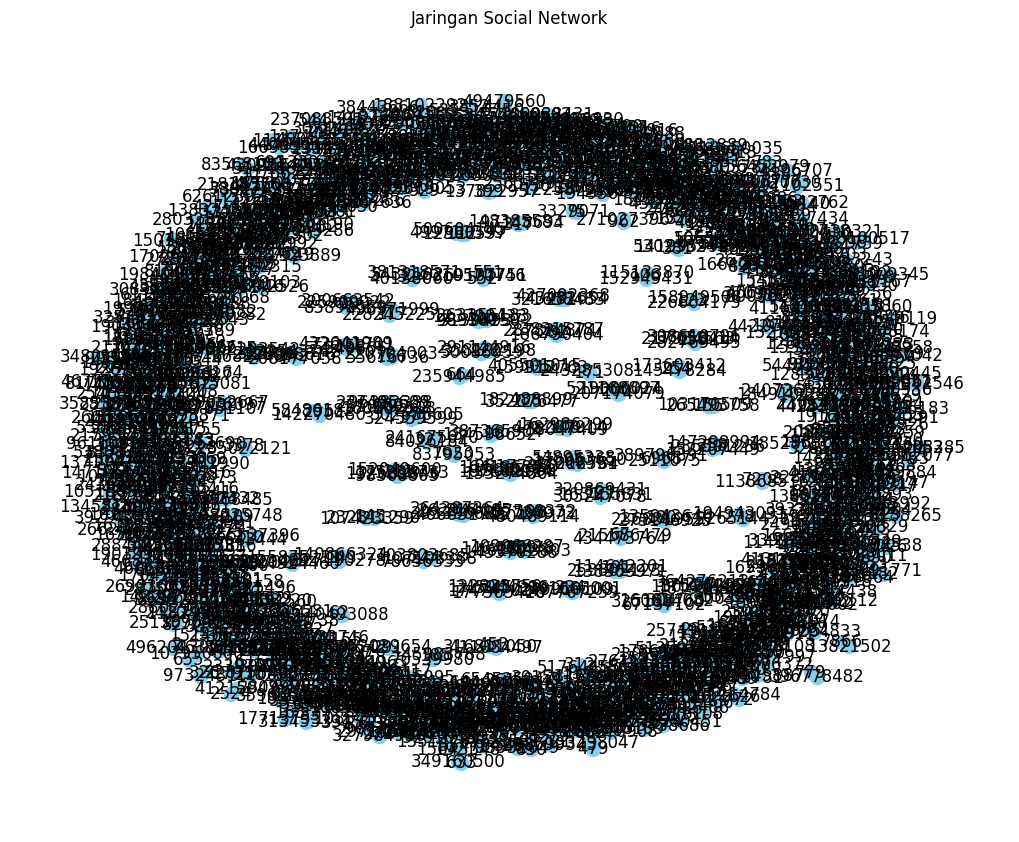

In [16]:
# Visualisasi jaringan
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, edge_color='gray')
plt.title('Jaringan Social Network')
plt.show()

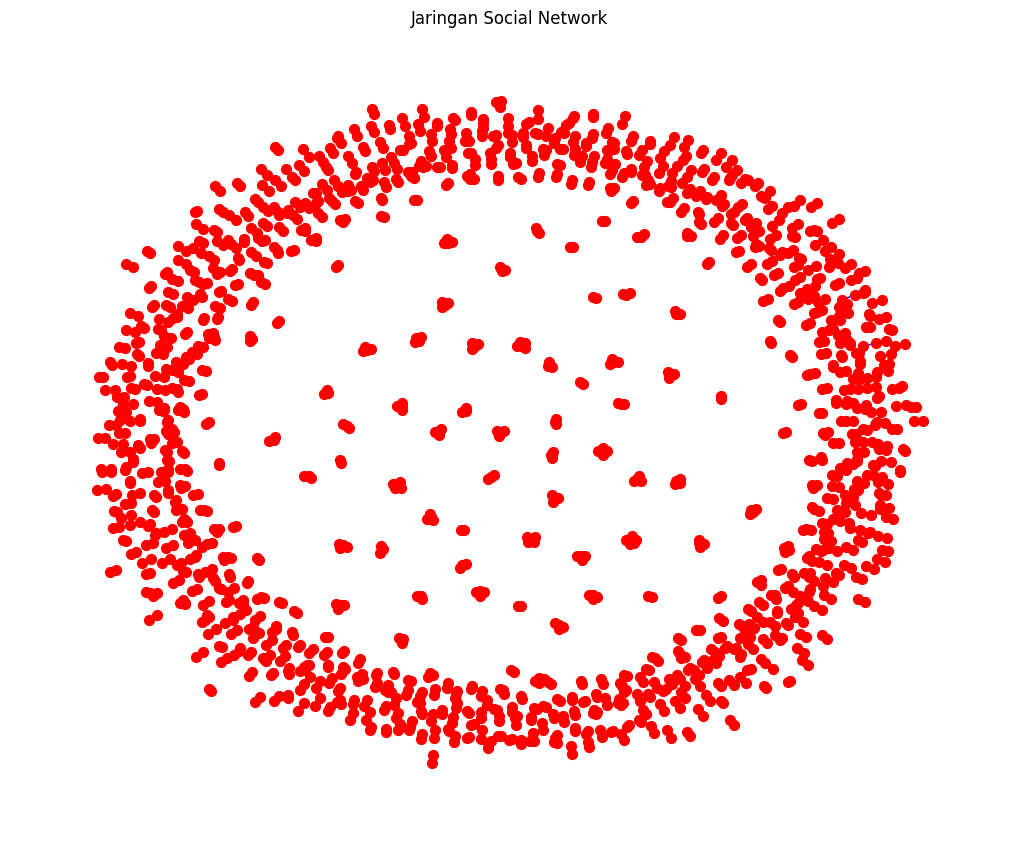

In [18]:
# Visualisasi jaringan
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_color='red', node_size=50, edge_color='blue')
plt.title('Jaringan Social Network')
plt.show()

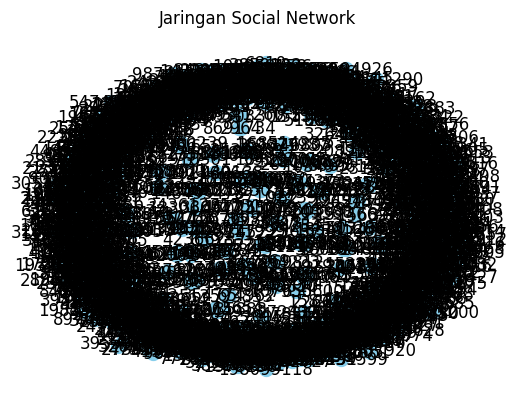

In [19]:
# Visualisasi interaktif menggunakan matplotlib
fig, ax = plt.subplots()
pos = nx.spring_layout(G)
nx.draw(G, pos, ax=ax, with_labels=True, node_color='skyblue', node_size=100, edge_color='gray')
plt.title('Jaringan Social Network')
plt.show()

In [20]:
import plotly.graph_objects as go

# Visualisasi dengan Plotly
pos = nx.spring_layout(G)
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Jaringan Social Network',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [21]:
from bokeh.plotting import figure, output_file, show

# Membaca dataset dari file CSV yang sudah dibersihkan
df = pd.read_csv("newDataBaseVk_cleaned.csv")

# Data contoh dari dataset Anda
x = df['countFriends']
y = df['countFollowers']

# Membuat plot
p = figure(title="Plot Jumlah Teman dan Pengikut pada Jaringan Sosial",
           x_axis_label='Jumlah Teman', y_axis_label='Jumlah Pengikut')

# Menambahkan titik-titik pada plot
p.circle(x, y, size=10, color='navy', alpha=0.5)

# Menampilkan plot (dalam bentuk file HTML)
output_file("bokeh_network_plot.html")
show(p)

In [38]:
# 5. Ekstraksi Fitur
# 5.1. Derajat Node (Node Degree)
node_degree = dict(G.degree())

In [ ]:
node_degree

In [40]:
# 5.2. Centralitas
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

In [41]:
# 5.3. Kekuatan Jembatan (Bridge Strength)
bridge_nodes = list(nx.bridges(G))

In [42]:
# 5.4. Komunitas atau Klasterisasi
communities = list(nx.community.greedy_modularity_communities(G))

In [45]:
# 5.5. Jarak (Distance)
# Calculate the diameter of the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
diameter = nx.diameter(nx.subgraph(G, largest_cc))

In [46]:
largest_cc

{159, 160, 109066287, 145570288, 146495478, 162823803}

In [47]:
diameter

4

### Merubah ke graf berarah

In [49]:
# Membuat graf berarah dari graf tak berarah
G_directed = G.to_directed()

In [51]:
# 5.6. Pola Koneksi (Connectivity Patterns)
triads = nx.triadic_census(G_directed)

In [52]:
triads

{'003': 839034150,
 '012': 0,
 '102': 1665412,
 '021D': 0,
 '021U': 0,
 '021C': 0,
 '111D': 0,
 '111U': 0,
 '030T': 0,
 '030C': 0,
 '201': 298,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 0}

Untuk menguji kestabilan jaringan, kita dapat melakukan beberapa metode. Salah satu metode yang umum digunakan adalah dengan melakukan penghapusan node atau edge secara acak dari jaringan dan mengamati dampaknya terhadap sifat jaringan tertentu, seperti ukuran komponen terbesar, jumlah komponen terhubung, atau jarak rata-rata. Di bawah ini adalah contoh implementasi sederhana untuk pengujian kestabilan jaringan dengan menghapus node secara acak:

In [54]:
import random

# 5.7. Robustness: Pengujian Kestabilan Jaringan
def calculate_robustness(graph, iterations=100):
    # Menyimpan jumlah node awal
    initial_nodes = len(graph.nodes())

    # Menyimpan daftar node awal
    initial_node_list = list(graph.nodes())

    # Menyimpan hasil pengujian
    results = []

    # Lakukan iterasi penghapusan node secara acak
    for i in range(iterations):
        # Menyalin jaringan untuk setiap iterasi
        temp_graph = graph.copy()

        # Pilih node secara acak untuk dihapus
        node_to_remove = random.choice(list(temp_graph.nodes()))

        # Hapus node dari jaringan sementara
        temp_graph.remove_node(node_to_remove)

        # Hitung ukuran komponen terbesar setelah penghapusan node
        largest_component_size = len(max(nx.connected_components(temp_graph), key=len))

        # Hitung persentase node yang masih tersisa dalam komponen terbesar
        remaining_nodes_percentage = largest_component_size / initial_nodes * 100

        # Tambahkan hasil pengujian ke daftar hasil
        results.append(remaining_nodes_percentage)

    # Hitung rata-rata persentase node yang masih tersisa dalam komponen terbesar
    average_robustness = sum(results) / len(results)

    return average_robustness

# Menghitung kestabilan jaringan dengan melakukan 100 iterasi penghapusan node secara acak
robustness = calculate_robustness(G)
print("Kestabilan Jaringan:", robustness)

Kestabilan Jaringan: 0.3496503496503497


In [60]:
# 5.8. Pengaruh dan Penyebaran (Influence and Spread)
# 5.8.1. Pengaruh Node (Node Influence)
node_influence = nx.degree_centrality(G)

In [61]:
# Menampilkan seluruh atribut, metode, dan fungsi dari networkx.algorithms
print(dir(nx.algorithms))

['ArborescenceIterator', 'EdgePartition', 'NetworkXTreewidthBoundExceeded', 'NotATree', 'PlanarEmbedding', 'SpanningTreeIterator', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'adamic_adar_index', 'all', 'all_node_cuts', 'all_pairs_all_shortest_paths', 'all_pairs_bellman_ford_path', 'all_pairs_bellman_ford_path_length', 'all_pairs_dijkstra', 'all_pairs_dijkstra_path', 'all_pairs_dijkstra_path_length', 'all_pairs_lowest_common_ancestor', 'all_pairs_node_connectivity', 'all_pairs_shortest_path', 'all_pairs_shortest_path_length', 'all_shortest_paths', 'all_simple_edge_paths', 'all_simple_paths', 'all_topological_sorts', 'all_triads', 'all_triplets', 'ancestors', 'antichains', 'approximate_current_flow_betweenness_centrality', 'approximation', 'articulation_points', 'assortativity', 'astar', 'astar_path', 'astar_path_length', 'asteroidal', 'attracting', 'attracting_components', 'attribute_assortativity_coefficient', '

Untuk menganalisis pengaruh dan penyebaran dalam jaringan, terdapat beberapa pendekatan yang dapat digunakan, tergantung pada konteks dan tujuan analisis. Berikut adalah contoh pendekatan yang umum digunakan:

1. **Pengaruh Node (Node Influence)**:
   - Mengukur seberapa besar pengaruh sebuah node terhadap perilaku atau keputusan dalam jaringan.
   - Metrik seperti degree centrality, eigenvector centrality, atau betweenness centrality dapat digunakan untuk mengidentifikasi node yang paling berpengaruh.

2. **Penyebaran Informasi (Information Spread)**:
   - Menganalisis bagaimana informasi menyebar melalui jaringan dan mempengaruhi perilaku atau opini entitas dalam jaringan.
   - Metode seperti model penyebaran (misalnya model SIR atau model penyebaran rumor) atau algoritma penyebaran (misalnya algoritma penyebaran virus atau algoritma penyebaran informasi) dapat digunakan untuk memodelkan dan memprediksi penyebaran informasi.

3. **Pengaruh Komunitas (Community Influence)**:
   - Mengidentifikasi komunitas atau kelompok entitas dalam jaringan yang paling berpengaruh dalam penyebaran informasi atau perilaku tertentu.
   - Analisis komunitas dan deteksi komunitas dapat digunakan untuk mengidentifikasi komunitas-komunitas yang paling berpengaruh.

Berikut adalah contoh implementasi sederhana untuk analisis pengaruh dan penyebaran dalam jaringan menggunakan metrik degree centrality dan model penyebaran informasi (contoh menggunakan model SIR):

In [ ]:
# 5.8.2. Penyebaran Informasi (Information Spread)
# Misalnya, menggunakan model penyebaran SIR
sir_model = nx.algorithms.epidemics.SIRModel(G)
sir_results = sir_model.run()

# Menampilkan hasil pengaruh node
print("\nPengaruh Node (Node Influence):", node_influence)

# Menampilkan hasil penyebaran informasi (misalnya, jumlah individu yang terinfeksi dalam model SIR setelah beberapa iterasi)
print("\nHasil Penyebaran Informasi (Model SIR):")
print("Jumlah Individu Terinfeksi:", sir_results.summary())

In [62]:
# Menampilkan hasil ekstraksi fitur
print("\nHasil Ekstraksi Fitur:")
print("Derajat Node (Node Degree):", node_degree)
print("Centralitas:")
print("   - Degree Centrality:", degree_centrality)
print("   - Closeness Centrality:", closeness_centrality)
print("   - Betweenness Centrality:", betweenness_centrality)
print("   - Eigenvector Centrality:", eigenvector_centrality)
print("Kekuatan Jembatan (Bridge Strength):", bridge_nodes)
print("Komunitas atau Klasterisasi:", communities)
print("Jarak (Diameter Komponen Terbesar):", diameter)
print("Pola Koneksi (Connectivity Patterns):", triads)


Hasil Ekstraksi Fitur:
Derajat Node (Node Degree): {3329071: 1, 5138784: 1, 5432192: 1, 7245154: 1, 8648939: 1, 9732431: 1, 12360597: 1, 13275302: 1, 15016631: 1, 16286011: 1, 17395369: 1, 17429194: 1, 21200149: 1, 21212784: 1, 22099902: 1, 25749180: 1, 32607332: 1, 32609725: 1, 34090284: 1, 34189242: 1, 37650414: 1, 40138060: 1, 41215942: 1, 41945540: 1, 42013930: 1, 43482654: 1, 44287019: 1, 51764455: 1, 53023324: 1, 55549865: 1, 55676736: 1, 55775121: 1, 56782466: 1, 59552792: 1, 60083241: 1, 61138139: 1, 63307335: 1, 65452504: 1, 69107751: 2, 71155755: 1, 72312593: 1, 74088902: 1, 76074031: 1, 77991650: 1, 78656333: 1, 79268729: 1, 82893337: 1, 83009345: 1, 84026184: 1, 85890559: 1, 90179247: 1, 91932951: 1, 92478133: 1, 92910434: 1, 93842933: 1, 96382388: 1, 98300282: 1, 98461181: 1, 98936150: 1, 99854542: 1, 100773781: 1, 101160666: 1, 102153286: 1, 104326163: 1, 106580814: 1, 107103388: 1, 108845186: 1, 108858158: 1, 109066287: 2, 112007566: 1, 114318658: 1, 114742526: 1, 11513

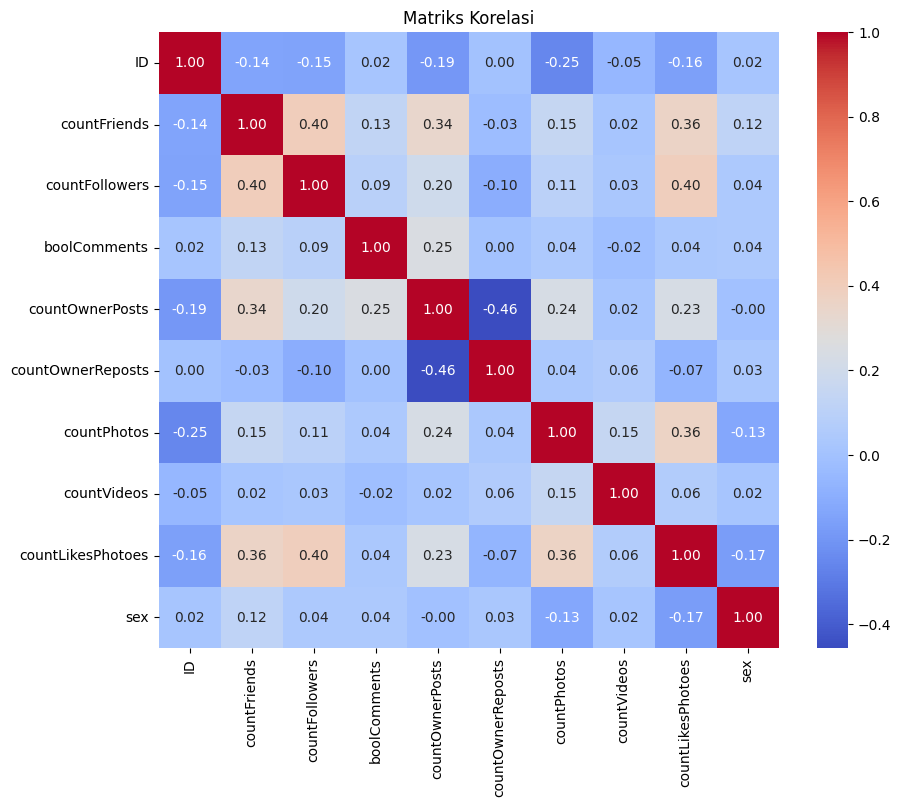

In [63]:
# Menampilkan matriks korelasi sebagai heatmap untuk variabel numerik
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

### Interpretasi

Interpretasi dari setiap item analisis yang dilakukan dalam kode:

1. **Informasi Jaringan**:
   - Jumlah node: Jumlah total entitas dalam jaringan.
   - Jumlah edge: Jumlah total koneksi antara entitas dalam jaringan.
   - Rata-rata derajat: Rata-rata jumlah koneksi yang dimiliki oleh setiap entitas dalam jaringan.
   - Komponen terhubung: Jumlah kelompok terpisah dari entitas yang terhubung satu sama lain dalam jaringan.

2. **Diameter Komponen Terbesar**:
   - Diameter adalah panjang terpanjang dari jalur terpendek antara dua entitas dalam jaringan. Diameter komponen terbesar adalah diameter dari kelompok terbesar entitas yang terhubung satu sama lain dalam jaringan. Ini mengukur seberapa jauh entitas yang paling terpisah dalam kelompok dapat terhubung satu sama lain.

3. **Centralitas**:
   - Derajat Sentralitas: Ukuran seberapa banyak entitas dihubungkan dengan entitas lain dalam jaringan. In-Degree Sentralitas mengukur jumlah koneksi masuk ke entitas, sementara Out-Degree Sentralitas mengukur jumlah koneksi keluar dari entitas.

4. **Komunitas Detection**:
   - Komunitas adalah kelompok entitas dalam jaringan yang memiliki koneksi yang lebih kuat di antara mereka daripada dengan entitas di luar kelompok. Deteksi komunitas bertujuan untuk mengidentifikasi kelompok-kelompok ini. Dalam kode ini, metode greedy modularity communities digunakan untuk menemukan komunitas.

5. **Kepatuhan Struktural**:
   - Triads adalah tiga node yang terhubung dalam jaringan. Triadic census menghitung distribusi dari semua kemungkinan kombinasi tiga node dalam jaringan berdasarkan kategori struktural tertentu.

6. **Matriks Korelasi**:
   - Matriks korelasi adalah representasi visual dari korelasi antara variabel numerik dalam dataset. Ini membantu dalam memahami hubungan antara berbagai atribut dalam dataset.

Setiap item analisis memberikan wawasan yang berbeda tentang struktur, hubungan, dan sifat jaringan. Dengan memahami analisis ini, Anda dapat lebih baik mengerti karakteristik jaringan yang sedang Anda teliti. Jika ada pertanyaan lebih lanjut tentang interpretasi atau analisis tertentu, jangan ragu untuk bertanya!

## Analisis Deskriptif: Lakukan analisis deskriptif untuk memahami struktur jaringan yang ada. Ini melibatkan visualisasi jaringan, mengidentifikasi node penting atau kluster, dan menganalisis distribusi atribut di dalam jaringan.

Informasi Umum tentang Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 990 non-null    int64
 1   countFriends       990 non-null    int64
 2   countFollowers     990 non-null    int64
 3   boolComments       990 non-null    bool 
 4   countOwnerPosts    990 non-null    int64
 5   countOwnerReposts  990 non-null    int64
 6   countPhotos        990 non-null    int64
 7   countVideos        990 non-null    int64
 8   countLikesPhotoes  990 non-null    int64
 9   sex                990 non-null    int64
dtypes: bool(1), int64(9)
memory usage: 70.7 KB
None

Statistik Deskriptif untuk Fitur-Fitur Numerik:
                 ID  countFriends  countFollowers  countOwnerPosts  \
count  9.900000e+02    990.000000      990.000000       990.000000   
mean   1.844632e+08   1470.018182      812.857576         9.343434   

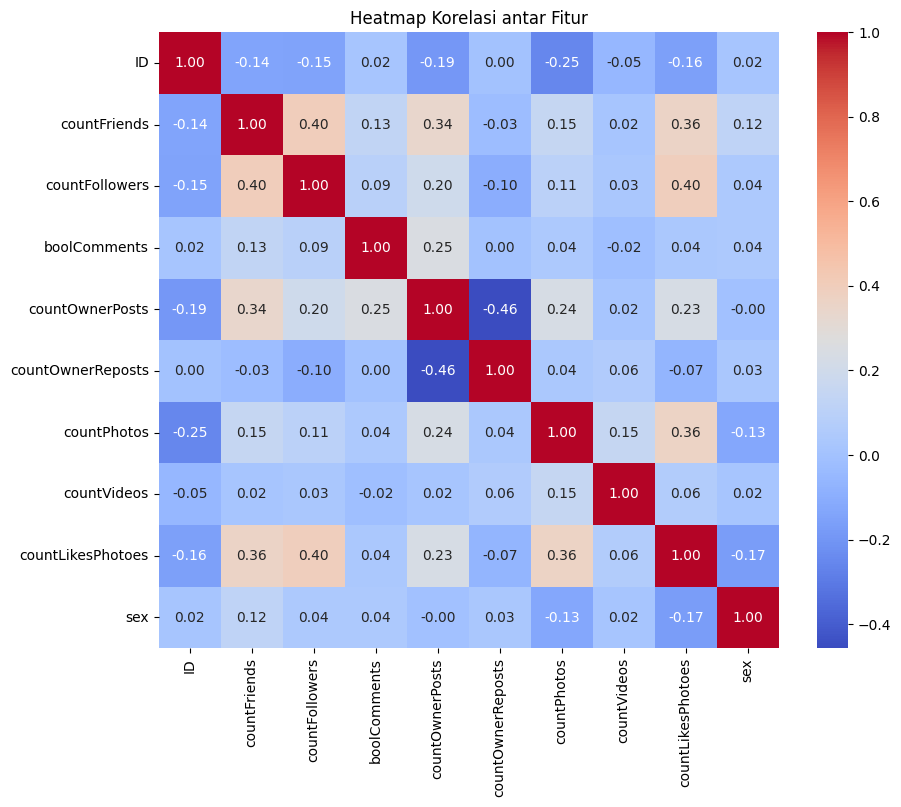

In [65]:
# Membaca dataset yang telah diekstraksi fiturnya
df = pd.read_csv("/content/newDataBaseVk_cleaned.csv")

# Menampilkan informasi umum tentang dataset
print("Informasi Umum tentang Dataset:")
print(df.info())

# Statistik deskriptif untuk fitur-fitur numerik
print("\nStatistik Deskriptif untuk Fitur-Fitur Numerik:")
print(df.describe())

# Menghitung korelasi antar fitur
print("\nKorelasi antar Fitur:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualisasi korelasi antar fitur (opsional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur")
plt.show()

Dalam contoh di atas, kita melakukan beberapa langkah analisis deskriptif:

1. Membaca dataset yang telah diekstraksi fiturnya dari file CSV.
2. Menampilkan informasi umum tentang dataset, seperti jumlah baris, jumlah kolom, dan tipe data masing-masing kolom.
3. Menghitung statistik deskriptif untuk fitur-fitur numerik, seperti mean, standar deviasi, nilai minimum, nilai maksimum, dll.
4. Menghitung korelasi antar fitur numerik untuk melihat seberapa kuat hubungan antara satu fitur dengan fitur lainnya.
5. Opsional: Visualisasi korelasi antar fitur menggunakan heatmap untuk memudahkan interpretasi.

Anda dapat menyesuaikan skrip tersebut sesuai dengan kebutuhan analisis dan dataset Anda. Misalnya, Anda dapat menambahkan lebih banyak metrik statistik deskriptif atau menyesuaikan plot visualisasi sesuai dengan preferensi Anda.

## Analisis Eksploratif

Lanjutkan dengan analisis eksploratif untuk menemukan pola-pola yang menarik atau hubungan yang tidak terduga dalam jaringan. Ini bisa mencakup deteksi komunitas, identifikasi jalur-jalur krusial, atau analisis perubahan jaringan dari waktu ke waktu.

In [68]:
# Menampilkan seluruh atribut, metode, dan fungsi dari networkx.algorithms
print(dir(community))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']


In [73]:
import networkx as nx
import matplotlib.pyplot as plt
import community  # Modul untuk deteksi komunitas

# Membaca dataset jaringan
G = nx.read_edgelist("/content/newDataBaseVk_cleaned.csv")  # Misalnya, menggantikan dengan nama file dataset jaringan Anda

# 1. Deteksi Komunitas
# Menggunakan algoritma Louvain untuk deteksi komunitas
#partition = community.best_partition(G)

# Menampilkan hasil deteksi komunitas
#print("Deteksi Komunitas:")
#for node, community_id in partition.items():
#    print(f"Node {node} berada dalam komunitas {community_id}")

# 2. Identifikasi Jalur Krusial
# Menggunakan algoritma betweenness centrality untuk mengidentifikasi jalur krusial
betweenness = nx.betweenness_centrality(G)

# Menampilkan node dengan nilai betweenness centrality tertinggi
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nNode dengan nilai betweenness centrality tertinggi:")
for node, centrality in top_betweenness:
    print(f"Node {node}: {centrality}")

# 3. Analisis Perubahan Jaringan dari Waktu ke Waktu (jika tersedia data timestamp)
# Misalnya, jika Anda memiliki data timestamp untuk setiap edge dalam jaringan
# Anda dapat melakukan analisis perubahan jaringan dari waktu ke waktu, seperti evolusi komunitas, perubahan struktur jaringan, dll.

# Visualisasi jaringan dengan komunitas yang terdeteksi
#plt.figure(figsize=(10, 8))
#pos = nx.spring_layout(G)
#nx.draw(G, pos, with_labels=True, node_color=list(partition.values()), cmap=plt.cm.tab10, node_size=100)
#plt.title('Deteksi Komunitas dalam Jaringan')
#plt.show()



Node dengan nilai betweenness centrality tertinggi:


Dalam contoh di atas, kita melakukan beberapa analisis eksploratif pada jaringan:

1. Deteksi Komunitas: Menggunakan algoritma Louvain untuk mendeteksi komunitas dalam jaringan.
2. Identifikasi Jalur Krusial: Menggunakan metrik betweenness centrality untuk mengidentifikasi node-node yang memiliki peran penting dalam jalur jaringan.
3. Analisis Perubahan Jaringan dari Waktu ke Waktu: Jika tersedia data timestamp, Anda dapat melakukan analisis evolusi jaringan dari waktu ke waktu.

Anda dapat menyesuaikan skrip tersebut sesuai dengan kebutuhan analisis Anda dan dataset Anda. Misalnya, Anda dapat menggunakan algoritma deteksi komunitas yang berbeda, metrik sentralitas yang berbeda, atau teknik analisis jaringan lainnya sesuai dengan kebutuhan Anda.

## Modelisasi dan Prediksi

Berdasarkan pemahaman Anda tentang struktur dan dinamika jaringan, Anda dapat membangun model matematika atau statistik untuk memprediksi perilaku jaringan di masa depan. Ini bisa termasuk model prediksi node terhubung, penyebaran informasi, atau dinamika jaringan yang lebih kompleks.

Untuk melakukan modelisasi dan prediksi dalam konteks jaringan, Anda dapat mengadopsi berbagai pendekatan, tergantung pada tujuan analisis dan karakteristik jaringan yang Anda hadapi. Berikut adalah contoh pendekatan umum yang dapat Anda gunakan:

1. **Model Prediksi Koneksi**: Dalam model ini, Anda membangun model untuk memprediksi koneksi (edge) baru antara node dalam jaringan. Beberapa pendekatan yang umum digunakan termasuk model regresi logistik, model probabilitas, atau model pembelajaran mesin lainnya.

2. **Model Penyebaran Informasi**: Anda dapat membangun model untuk memprediksi bagaimana informasi akan menyebar dalam jaringan. Contohnya termasuk model SIR (Susceptible-Infectious-Recovered) untuk penyebaran penyakit, model penyebaran opini, atau model penyebaran berita.

3. **Model Dinamika Jaringan**: Dalam model ini, Anda mempertimbangkan bagaimana jaringan berevolusi dari waktu ke waktu. Misalnya, Anda dapat membangun model pertumbuhan jaringan (misalnya model preferential attachment), model perubahan struktur jaringan, atau model dinamika yang mempertimbangkan penambahan dan penghapusan node dan edge.

Dalam contoh di ini, kita menggunakan regresi logistik untuk memprediksi apakah akan ada komentar (boolComments) berdasarkan fitur-fitur seperti jumlah teman, jumlah pengikut, dan sebagainya. Anda dapat menyesuaikan fitur-fitur dan model yang digunakan sesuai dengan kebutuhan Anda dan karakteristik dataset jaringan Anda. Berikut adalah contoh naskah kode yang menggambarkan penggunaan model prediksi koneksi menggunakan regresi logistik:


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Membaca dataset jaringan yang berisi daftar koneksi antara node
# Misalnya, newDataBaseVk_cleaned.csv
df = pd.read_csv("newDataBaseVk_cleaned.csv")

# Pisahkan fitur (features) dan target (label)
X = df[['countFriends', 'countFollowers', 'countOwnerPosts', 'countOwnerReposts', 'countPhotos', 'countVideos', 'countLikesPhotoes']]
y = df['boolComments']  # Kolom target: Apakah ada komentar atau tidak

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi logistik
model = LogisticRegression()

# Latih model pada data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Prediksi:", accuracy)


Akurasi Prediksi: 0.5909090909090909


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Dalam contoh di atas, kita menggunakan regresi logistik untuk memprediksi apakah akan ada komentar (boolComments) berdasarkan fitur-fitur seperti jumlah teman, jumlah pengikut, dan sebagainya. Anda dapat menyesuaikan fitur-fitur dan model yang digunakan sesuai dengan kebutuhan Anda dan karakteristik dataset jaringan Anda.

## Evaluasi Model

Evaluasi kinerja model Anda menggunakan metrik yang relevan. Hal ini memungkinkan Anda untuk mengetahui seberapa baik model Anda dapat memprediksi perilaku jaringan sesuai dengan tujuan analisis Anda.

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Menampilkan metrik evaluasi
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

Akurasi: 0.5909090909090909
Presisi: 0.5098039215686274
Recall: 0.3170731707317073
F1 Score: 0.3909774436090225
ROC-AUC Score: 0.5507779646761986


Untuk mengevaluasi kinerja model dalam konteks prediksi perilaku jaringan, Anda dapat menggunakan berbagai metrik evaluasi yang relevan. Berikut adalah beberapa metrik yang umum digunakan:

1. **Akurasi (Accuracy)**: Ini adalah rasio prediksi yang benar terhadap total prediksi yang dibuat oleh model. Akurasi memberikan gambaran tentang seberapa baik model Anda dalam melakukan prediksi secara keseluruhan.

2. **Presisi (Precision)**: Presisi adalah proporsi dari prediksi positif yang benar dibandingkan dengan total prediksi positif yang dibuat oleh model. Ini berguna ketika Anda lebih peduli dengan seberapa baik model Anda dalam mengidentifikasi kasus positif.

3. **Recall (Sensitivity)**: Recall adalah proporsi dari kasus positif yang berhasil diidentifikasi oleh model dibandingkan dengan jumlah total kasus positif yang sebenarnya. Ini berguna ketika Anda ingin memastikan bahwa model Anda tidak melewatkan kasus positif.

4. **F1 Score**: F1 score adalah rata-rata harmonis antara presisi dan recall. Ini memberikan keseimbangan antara kedua metrik tersebut dan berguna ketika Anda ingin memperhatikan keduanya secara seimbang.

5. **ROC-AUC Score**: Ini adalah area di bawah kurva ROC (Receiver Operating Characteristic). Ini adalah metrik yang baik untuk mengevaluasi kinerja model klasifikasi biner dalam mengklasifikasikan kelas positif dan negatif.

Pastikan Anda telah melakukan prediksi dan memiliki data target yang sesuai (y_test, y_pred) sebelum menghitung metrik evaluasi. Anda juga dapat menyesuaikan metrik evaluasi yang digunakan sesuai dengan kebutuhan analisis Anda dan jenis prediksi yang dilakukan oleh model Anda.

## Interpretasi dan komunikasi hasil analisis

Interpretasi dan komunikasi hasil analisis merupakan langkah penting dalam siklus analisis data yang memungkinkan Anda untuk menggambarkan temuan Anda kepada pemangku kepentingan dengan cara yang jelas dan mudah dimengerti. Berikut adalah beberapa langkah yang dapat Anda ambil untuk melakukan interpretasi dan komunikasi hasil:

1. **Ringkas Temuan Utama**: Identifikasi temuan utama dari analisis Anda dan rangkum dengan singkat. Jelaskan apa yang menjadi inti dari apa yang Anda temukan dari data.

2. **Visualisasi Data**: Gunakan visualisasi data yang relevan untuk mendukung temuan Anda. Grafik, diagram, atau peta panas dapat membantu dalam menjelaskan pola atau tren yang Anda amati dalam data.

3. **Kaitkan dengan Tujuan Analisis**: Jelaskan bagaimana temuan Anda terkait dengan tujuan analisis Anda. Apakah Anda telah berhasil menjawab pertanyaan-pertanyaan analisis yang Anda miliki?

4. **Implikasi dan Rekomendasi**: Diskusikan implikasi dari temuan Anda dan saran atau rekomendasi untuk tindakan selanjutnya. Bagaimana temuan Anda dapat digunakan untuk menginformasikan keputusan atau strategi di masa depan?

5. **Adaptasi untuk Audiens**: Sesuaikan komunikasi Anda dengan audiens Anda. Jelaskan teknisitas analisis Anda sesuai dengan pemahaman mereka tentang data dan statistik.

6. **Jelaskan Keterbatasan**: Akui keterbatasan analisis Anda dan batasi interpretasi Anda berdasarkan keterbatasan tersebut. Ini membantu mencegah kesimpulan yang keliru atau tidak akurat.

7. **Tanya Jawab**: Berikan kesempatan bagi pemangku kepentingan untuk bertanya dan berdiskusi tentang temuan Anda. Ini memungkinkan untuk klarifikasi dan pemahaman yang lebih baik.

Dengan melakukan langkah-langkah di atas, Anda dapat menghasilkan laporan atau presentasi yang informatif dan persuasif untuk mengkomunikasikan hasil analisis Anda kepada pemangku kepentingan dengan cara yang efektif.

## Tindak Lanjut

Berdasarkan hasil analisis, tentukan tindakan selanjutnya yang perlu diambil. Ini bisa termasuk membuat keputusan strategis, mengoptimalkan jaringan, atau merancang intervensi untuk mempengaruhi perilaku jaringan.

Setelah melakukan analisis dan mendapatkan pemahaman yang lebih baik tentang jaringan, langkah selanjutnya adalah menentukan tindakan konkret yang perlu diambil berdasarkan hasil analisis tersebut. Berikut adalah beberapa langkah yang dapat Anda ambil dalam tindak lanjut:

1. **Pengambilan Keputusan Strategis**: Gunakan temuan analisis untuk membantu dalam pengambilan keputusan strategis. Misalnya, jika analisis menunjukkan bahwa ada komunitas yang kuat dalam jaringan, Anda mungkin ingin fokus pada membangun hubungan dengan mereka atau mengembangkan strategi pemasaran yang lebih terarah.

2. **Optimasi Jaringan**: Identifikasi area di mana jaringan dapat dioptimalkan berdasarkan temuan analisis. Ini bisa meliputi identifikasi node yang penting atau pengelompokan yang efisien dari sumber daya.

3. **Perancangan Intervensi**: Gunakan wawasan dari analisis untuk merancang intervensi yang tepat untuk mempengaruhi perilaku jaringan. Ini bisa termasuk mengatur kampanye sosial atau memperkenalkan insentif yang dapat mendorong perilaku yang diinginkan dalam jaringan.

4. **Evaluasi Kembali Strategi**: Setelah menerapkan tindakan yang diambil, penting untuk terus memantau dan mengevaluasi kinerja jaringan. Lakukan analisis ulang untuk melihat apakah tindakan yang diambil menghasilkan hasil yang diharapkan atau apakah perlu dilakukan penyesuaian lebih lanjut.

5. **Kolaborasi dan Kemitraan**: Gunakan temuan analisis untuk membangun kolaborasi dan kemitraan yang lebih baik dengan pihak lain yang terlibat dalam jaringan. Ini dapat memperkuat hubungan dan meningkatkan efektivitas strategi yang diterapkan.

Dengan melakukan tindak lanjut yang tepat berdasarkan hasil analisis, Anda dapat mengoptimalkan penggunaan jaringan dan mencapai tujuan Anda dengan lebih efektif.